<a href="https://colab.research.google.com/github/avinashkumar18/Lab/blob/main/Deep%20Learning/Assessment%205/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Github link](https://https://github.com/avinashkumar18/Lab/blob/main/Deep%20Learning/Assessment%205/RNN.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_url = "https://raw.githubusercontent.com/avinashkumar18/Lab/main/Deep%20Learning/Assessment%205/FB_training_data.csv"
training_dataset = pd.read_csv(train_url)

In [4]:
test_url = "https://raw.githubusercontent.com/avinashkumar18/Lab/main/Deep%20Learning/Assessment%205/FB_test_data.csv"
test_dataset = pd.read_csv(test_url)

In [6]:
training_dataset = training_dataset.iloc[:, 1].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_dataset = scaler.fit_transform(training_dataset.reshape(-1, 1))

In [10]:
x_train_data = []
y_train_data = []
for i in range(40, len(training_dataset)):
    x_train_data.append(training_dataset[i-40:i, 0])
    y_train_data.append(training_dataset[i, 0])
x_train_data = np.array(x_train_data)
y_train_data = np.array(y_train_data)
print(x_train_data.shape, y_train_data.shape)

(1218, 40) (1218,)


In [11]:
#reshaping
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))
x_train_data.shape

(1218, 40, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
rnn_model = Sequential()

In [14]:
#1st layer
rnn_model.add(LSTM(units = 45, return_sequences = True, input_shape = (x_train_data.shape[1], 1)))
rnn_model.add(Dropout(0.2))

In [15]:
#2nd, 3rd, 4th layer
for i in [True, True, False]:
    rnn_model.add(LSTM(units = 45, return_sequences = i))
    rnn_model.add(Dropout(0.2))

In [16]:
#output layer
rnn_model.add(Dense(units = 1))

In [17]:
#compile and fit the model
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
rnn_model.fit(x_train_data, y_train_data, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 36s 45ms/step - loss: 0.0996
Epoch 2/100
39/39 [==============================] - 2s 42ms/step - loss: 0.0088
Epoch 3/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0066
Epoch 4/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0064
Epoch 5/100
39/39 [==============================] - 2s 42ms/step - loss: 0.0052
Epoch 6/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0077
Epoch 7/100
39/39 [==============================] - 2s 42ms/step - loss: 0.0061
Epoch 8/100
39/39 [==============================] - 2s 42ms/step - loss: 0.0056
Epoch 9/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0063
Epoch 10/100
39/39 [==============================] - 2s 42ms/step - loss: 0.0066
Epoch 11/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0057
Epoch 12/100
39/39 [==============================] - 2s 42ms/step - loss: 0.0061
Epoch 13/100
39/39 [====

In [18]:
test_dataset = test_dataset.iloc[:, 1].values
test_dataset.shape

(21,)

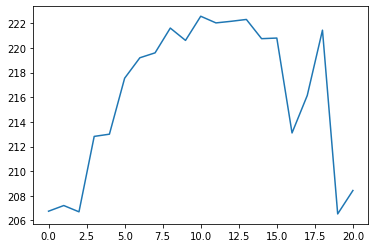

In [19]:
plt.plot(test_dataset)

In [22]:
unscaled_train_data = pd.read_csv(train_url)
unscaled_test_data = pd.read_csv(test_url)
data = pd.concat((unscaled_train_data['Open'], unscaled_test_data['Open']), axis = 0)

In [24]:
x_test_data = data[len(data) - len(test_dataset) - 40:].values
x_test_data = np.reshape(x_test_data, (-1, 1))
x_test_data = scaler.transform(x_test_data)

In [25]:
final_x_test_data = []
for i in range(40, len(x_test_data)):
    final_x_test_data.append(x_test_data[i-40:i, 0])
final_x_test_data = np.array(final_x_test_data)

In [30]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1], 1))

In [31]:
pred = rnn_model.predict(final_x_test_data)

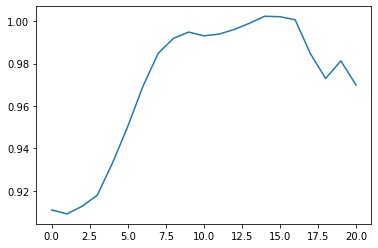

In [32]:
plt.clf()
plt.plot(pred)

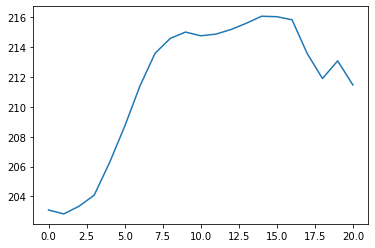

In [33]:
unscaled_pred = scaler.inverse_transform(pred)
plt.clf()
plt.plot(unscaled_pred)

Text(0.5, 1.0, 'Facebook Stock Predictions')

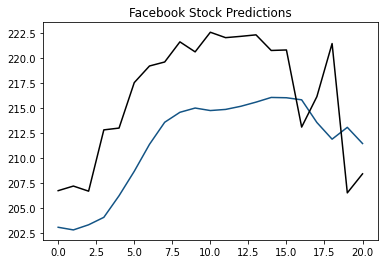

In [34]:
plt.plot(unscaled_pred, color = '#135485', label = "Predictions")
plt.plot(test_dataset, color = 'black', label = "Real Data")
plt.title('Facebook Stock Predictions')